In [1]:
import numpy
import tensorflow as tf

# Se comprubea las versiones de numpy y tf.
print("NumPy version:", numpy.__version__)
print("TensorFlow version:", tf.__version__)


NumPy version: 1.23.0
TensorFlow version: 2.10.0


In [15]:
import os
import rasterio
import numpy as np
from _tiles_utils import segment_and_pad, store_segments

In [5]:
target_tile_height = 256
target_tile_width = 256

# Establece las rutas a los directorios correspondientes
training_image_directory_amazon = '../data/download/AMAZON/Training/image/'
training_label_directory_amazon = '../data/download/AMAZON/Training/label/'

validation_image_directory_amazon = '../data/download/AMAZON/Validation/images/'
validation_label_directory_amazon = '../data/download/AMAZON/Validation/masks/'

test_image_directory_amazon = '../data/download/AMAZON/Test/image/'
test_label_directory_amazon = '../data/download/AMAZON/Test/mask/'

# Crea listas de rutas de archivos de imágenes y etiquetas para todos los archivos .tif
training_image_paths_amazon = [
    os.path.join(training_image_directory_amazon, file_name) 
    for file_name in os.listdir(training_image_directory_amazon) 
    if file_name.endswith('.tif')
]

training_label_paths_amazon = [
    os.path.join(training_label_directory_amazon, file_name) 
    for file_name in os.listdir(training_label_directory_amazon) 
    if file_name.endswith('.tif')
]

validation_image_paths_amazon = [
    os.path.join(validation_image_directory_amazon, file_name) 
    for file_name in os.listdir(validation_image_directory_amazon) 
    if file_name.endswith('.tif')
]

validation_label_paths_amazon = [
    os.path.join(validation_label_directory_amazon, file_name) 
    for file_name in os.listdir(validation_label_directory_amazon) 
    if file_name.endswith('.tif')
]

test_image_paths_amazon = [
    os.path.join(test_image_directory_amazon, file_name) 
    for file_name in os.listdir(test_image_directory_amazon) 
    if file_name.endswith('.tif')
]

test_label_paths_amazon = [
    os.path.join(test_label_directory_amazon, file_name) 
    for file_name in os.listdir(test_label_directory_amazon) 
    if file_name.endswith('.tif')
]


In [7]:
# --- Training ---
# Iteramos sobre las rutas de las imágenes y etiquetas correspondientes al conjunto de entrenamiento
for image_path, label_path in zip(training_image_paths_amazon, training_label_paths_amazon):
    # Extraemos el nombre base del archivo de imagen (sin la extensión)
    basename = os.path.splitext(os.path.basename(image_path))[0]
    
    # Abrimos y leemos la imagen desde la ruta especificada
    with rasterio.open(image_path) as image_src:
        image = image_src.read()
    
    # Abrimos y leemos la etiqueta desde la ruta especificada
    with rasterio.open(label_path) as label_src:
        label = label_src.read()
    
    # Dividimos y rellenamos las imágenes en bloques (tiles) del tamaño objetivo
    image_tiles = segment_and_pad(image, target_tile_height, target_tile_width)
    label_tiles = segment_and_pad(label, target_tile_height, target_tile_width)
    
    # Guardamos los bloques de imágenes en la nueva ruta, reemplazando 'download' por 'edit' en el directorio
    store_segments(image_tiles, training_image_directory_amazon.replace('download', 'edit'), basename)
    
    # Guardamos los bloques de etiquetas en la nueva ruta, reemplazando 'download' por 'edit' en el directorio
    store_segments(label_tiles, training_label_directory_amazon.replace('download', 'edit'), basename)


c:\Users\alber\Downloads\New Folder\tfm\.venv\lib\site-packages\rasterio\__init__.py:396: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


In [8]:
# --- Validation ---
# Iteramos sobre las rutas de las imágenes y etiquetas correspondientes al conjunto de validación
for image_path, label_path in zip(validation_image_paths_amazon, validation_label_paths_amazon):
    # Extraemos el nombre base del archivo de imagen (sin la extensión)
    basename = os.path.splitext(os.path.basename(image_path))[0]
    
    # Abrimos y leemos la imagen desde la ruta especificada
    with rasterio.open(image_path) as src_image:
        image = src_image.read()
    
    # Abrimos y leemos la etiqueta desde la ruta especificada
    with rasterio.open(label_path) as src_label:
        label = src_label.read()
    
    # Dividimos y rellenamos las imágenes en bloques (tiles) del tamaño objetivo
    image_tiles = segment_and_pad(image, target_tile_height, target_tile_width)
    label_tiles = segment_and_pad(label, target_tile_height, target_tile_width)
    
    # Guardamos los bloques de imágenes en la nueva ruta, reemplazando 'download' por 'edit' en el directorio
    store_segments(image_tiles, validation_image_directory_amazon.replace('download', 'edit'), basename)
    
    # Guardamos los bloques de etiquetas en la nueva ruta, reemplazando 'download' por 'edit' en el directorio
    store_segments(label_tiles, validation_label_directory_amazon.replace('download', 'edit'), basename)


In [9]:
# --- Test ---
# Iteramos sobre las rutas de las imágenes y etiquetas correspondientes al conjunto de prueba
for image_path, label_path in zip(test_image_paths_amazon, test_label_paths_amazon):
    # Extraemos el nombre base del archivo de imagen (sin la extensión)
    basename = os.path.splitext(os.path.basename(image_path))[0]
    
    # Abrimos y leemos la imagen desde la ruta especificada
    with rasterio.open(image_path) as src_image:
        image = src_image.read()
    
    # Abrimos y leemos la etiqueta desde la ruta especificada
    with rasterio.open(label_path) as src_label:
        label = src_label.read()
    
    # Dividimos y rellenamos las imágenes en bloques (tiles) del tamaño objetivo
    image_tiles = segment_and_pad(image, target_tile_height, target_tile_width)
    label_tiles = segment_and_pad(label, target_tile_height, target_tile_width)
    
    # Guardamos los bloques de imágenes en la nueva ruta, reemplazando 'download' por 'edit' en el directorio
    store_segments(image_tiles, test_image_directory_amazon.replace('download', 'edit'), basename)
    
    # Guardamos los bloques de etiquetas en la nueva ruta, reemplazando 'download' por 'edit' en el directorio
    store_segments(label_tiles, test_label_directory_amazon.replace('download', 'edit'), basename)


c:\Users\alber\Downloads\New Folder\tfm\.venv\lib\site-packages\rasterio\__init__.py:386: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


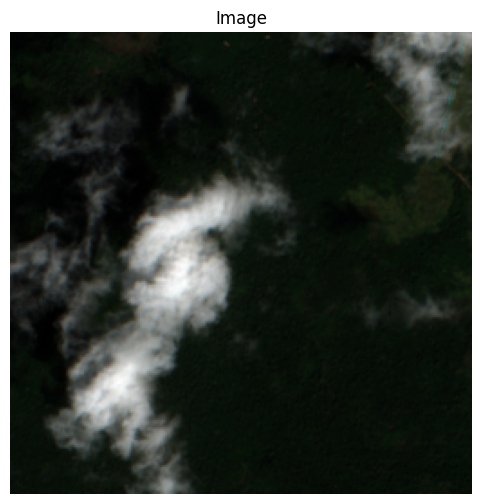

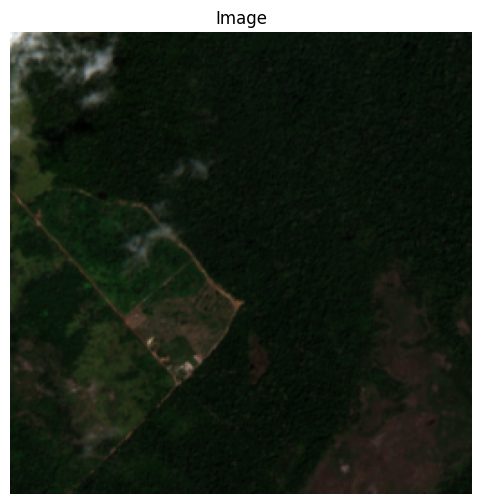

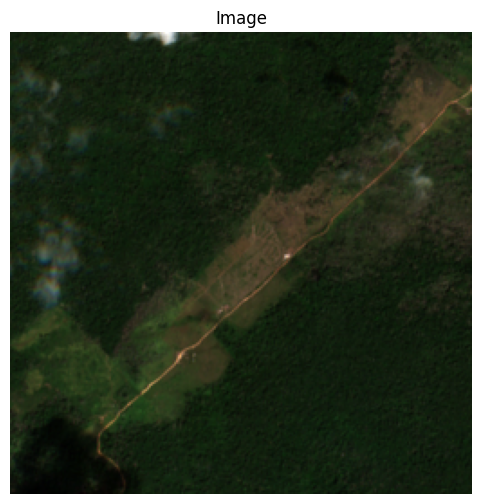

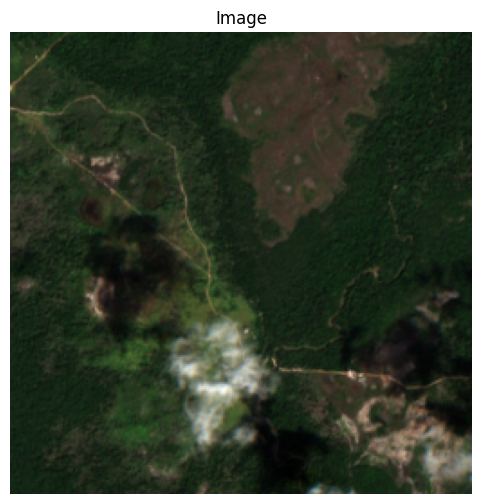

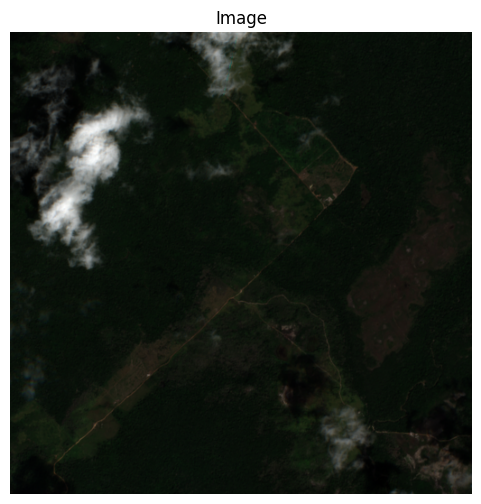

In [16]:
from _tiles_utils import show_geotiff

# Definimos la ruta original del conjunto de entrenamiento y obtenemos la lista de archivos
sample_path_original = training_image_directory_amazon
sample_files_original = os.listdir(sample_path_original)
sample_files_original.sort()  # Ordenamos los archivos

# Definimos la nueva ruta editada (con 'download' reemplazado por 'edit') y obtenemos la lista de archivos
sample_path = training_image_directory_amazon.replace('download', 'edit')
sample_files = os.listdir(sample_path)
sample_files.sort()  # Ordenamos los archivos

# Mostramos la lista de archivos
sample_files

# Visualizamos los primeros 4 archivos de la ruta editada
for i in range(4):
    show_geotiff(sample_path + sample_files[i])

# Visualizamos el primer archivo de la ruta original
show_geotiff(sample_path_original + sample_files_original[0])


In [17]:
import pandas as pd
from _tiles_utils import check_dimensions


# Establecemos las rutas a las carpetas con las variables
folders = [
    training_image_directory_amazon.replace('download', 'edit'),
    training_label_directory_amazon.replace('download', 'edit'),
    validation_image_directory_amazon.replace('download', 'edit'),
    validation_label_directory_amazon.replace('download', 'edit'),
    test_image_directory_amazon.replace('download', 'edit'),
    test_label_directory_amazon.replace('download', 'edit')
]

# Inicializamos el archivo CSV con los encabezados
pd.DataFrame(columns=['File', 'Dimensions', 'Channels']).to_csv("../data/edit/generated_tile_shape_diagnostics.csv", index=False)

# Revisamos las dimensiones para cada carpeta
for folder in folders:
    print(f"Checking dimensions for files in folder: {folder}")
    check_dimensions(folder)
    print("\n")

Checking dimensions for files in folder: ../data/edit/AMAZON/Training/image/


c:\Users\alber\Downloads\New Folder\tfm\.venv\lib\site-packages\rasterio\__init__.py:386: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)




Checking dimensions for files in folder: ../data/edit/AMAZON/Training/label/


Checking dimensions for files in folder: ../data/edit/AMAZON/Validation/images/


Checking dimensions for files in folder: ../data/edit/AMAZON/Validation/masks/


Checking dimensions for files in folder: ../data/edit/AMAZON/Test/image/


Checking dimensions for files in folder: ../data/edit/AMAZON/Test/mask/


